In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
df_aire = pd.read_csv("air_traffic_data.csv")

FileNotFoundError: ignored

# Nueva sección

In [3]:
df_aire

NameError: ignored

vemos cuantas veces aparece cada compañia

In [ ]:
compañias = df_aire["Operating Airline"].value_counts()
compañias


United Airlines - Pre 07/01/2013    2154
SkyWest Airlines                     963
United Airlines                      892
Alaska Airlines                      751
Delta Air Lines                      386
                                    ... 
Evergreen International Airlines       2
Atlas Air, Inc                         2
Xtra Airways                           2
Pacific Aviation                       2
Boeing Company                         1
Name: Operating Airline, Length: 77, dtype: int64

vemos cuantas compañias distintas hay en cada pais


In [ ]:
df_aire.groupby('GEO Region')['Operating Airline'].nunique()

GEO Region
Asia                   20
Australia / Oceania     4
Canada                 10
Central America         3
Europe                 19
Mexico                  7
Middle East             2
South America           1
US                     36
Name: Operating Airline, dtype: int64

vemos en que año empezo cada compañia y el promedio de cuando empezo cada uno  de los paises


In [ ]:
df_aire.groupby('Operating Airline')['Year'].min()

Operating Airline
ATA Airlines         2005
Aer Lingus           2007
Aeromexico           2007
Air Berlin           2010
Air Canada           2005
                     ... 
Virgin Atlantic      2005
WestJet Airlines     2005
World Airways        2009
XL Airways France    2012
Xtra Airways         2006
Name: Year, Length: 77, dtype: int64

In [ ]:
df_aire.groupby(['GEO Region','Operating Airline'])['Year'].mean()

GEO Region  Operating Airline               
Asia        Air China                           2010.382239
            Air India Limited                   2015.750000
            All Nippon Airways                  2010.372093
            Asiana Airlines                     2010.372093
            Cathay Pacific                      2010.372093
                                                   ...     
US          United Airlines                     2012.094595
            United Airlines - Pre 07/01/2013    2008.885932
            Virgin America                      2011.426540
            World Airways                       2012.000000
            Xtra Airways                        2006.000000
Name: Year, Length: 102, dtype: float64

eliminamos los campos redundantes o innecesarias como boarding area, pusblihed airline, terminal...

In [ ]:
df_aire2 = df_aire.drop(['Activity Type Code','Passenger Count','Published Airline IATA Code','Published Airline','Terminal','Activity Period','Operating Airline IATA Code','Boarding Area'], axis=1)












vemos que comapñias empezaron antes y de que pais eran


In [ ]:
df_aire.groupby(['Operating Airline','GEO Region'])['Year'].min().sort_values(ascending=True).to_frame()

,,Year
Operating Airline,GEO Region,
ATA Airlines,Canada,2005
Frontier Airlines,US,2005
Hawaiian Airlines,US,2005
Horizon Air,US,2005
Icelandair,Europe,2005
...,...,...
Swissport USA,Asia,2014
Air India Limited,Asia,2015
"COPA Airlines, Inc.",Central America,2015


In [ ]:
df_aire2

,Operating Airline,GEO Summary,GEO Region,Price Category Code,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
0,ATA Airlines,Domestic,US,Low Fare,Deplaned,27271,2005,July
1,ATA Airlines,Domestic,US,Low Fare,Enplaned,29131,2005,July
2,ATA Airlines,Domestic,US,Low Fare,Thru / Transit * 2,10830,2005,July
3,Air Canada,International,Canada,Other,Deplaned,35156,2005,July
4,Air Canada,International,Canada,Other,Enplaned,34090,2005,July
...,...,...,...,...,...,...,...,...
15002,Virgin America,Domestic,US,Low Fare,Enplaned,194636,2016,March
15003,Virgin America,International,Mexico,Low Fare,Deplaned,4189,2016,March
15004,Virgin America,International,Mexico,Low Fare,Enplaned,4693,2016,March
15005,Virgin Atlantic,International,Europe,Other,Deplaned,12313,2016,March


modificamos los valores de texto en numeros para poder hacer luego los tests y tenerlos en cuenta

In [ ]:

df_aire2['Price Category Code'].replace(['Low Fare','Other'],[0,1],inplace=True)
df_aire2


,Operating Airline,GEO Summary,GEO Region,Price Category Code,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
0,ATA Airlines,Domestic,US,0,Deplaned,27271,2005,July
1,ATA Airlines,Domestic,US,0,Enplaned,29131,2005,July
2,ATA Airlines,Domestic,US,0,Thru / Transit * 2,10830,2005,July
3,Air Canada,International,Canada,1,Deplaned,35156,2005,July
4,Air Canada,International,Canada,1,Enplaned,34090,2005,July
...,...,...,...,...,...,...,...,...
15002,Virgin America,Domestic,US,0,Enplaned,194636,2016,March
15003,Virgin America,International,Mexico,0,Deplaned,4189,2016,March
15004,Virgin America,International,Mexico,0,Enplaned,4693,2016,March
15005,Virgin Atlantic,International,Europe,1,Deplaned,12313,2016,March


comprobamos que no haya otros valores que desconozcamos al pasarlos a numero, y como vemos solo hay 2, los que valen 1 y los que valen 0

In [ ]:
df_aire.groupby('GEO Region')['Price Category Code'].nunique()

GEO Region
Asia                   2
Australia / Oceania    2
Canada                 2
Central America        1
Europe                 2
Mexico                 2
Middle East            2
South America          1
US                     2
Name: Price Category Code, dtype: int64

hacemos lo mismo con la columna geo summary, que nos dice si son internacionales o dentro del propio pais

In [ ]:
df_aire2['GEO Summary'].replace(['Domestic','International'],[0,1],inplace=True)
df_aire2


,Operating Airline,GEO Summary,GEO Region,Price Category Code,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
0,ATA Airlines,0,US,0,Deplaned,27271,2005,July
1,ATA Airlines,0,US,0,Enplaned,29131,2005,July
2,ATA Airlines,0,US,0,Thru / Transit * 2,10830,2005,July
3,Air Canada,1,Canada,1,Deplaned,35156,2005,July
4,Air Canada,1,Canada,1,Enplaned,34090,2005,July
...,...,...,...,...,...,...,...,...
15002,Virgin America,0,US,0,Enplaned,194636,2016,March
15003,Virgin America,1,Mexico,0,Deplaned,4189,2016,March
15004,Virgin America,1,Mexico,0,Enplaned,4693,2016,March
15005,Virgin Atlantic,1,Europe,1,Deplaned,12313,2016,March


comprobamos que lo hayamos hecho bien

In [ ]:
df_aire['GEO Summary'].nunique()

2

In [ ]:

df_aire.groupby('GEO Region')['GEO Summary'].nunique()

GEO Region
Asia                   1
Australia / Oceania    1
Canada                 1
Central America        1
Europe                 1
Mexico                 1
Middle East            1
South America          1
US                     1
Name: GEO Summary, dtype: int64

Aqui vemos que cada pais solo tiene un tipo de GEO summary, por lo que podemos eliminar esta columna y solo tener en cuenta el pais en el que se encuentra la compañia

eliminamos las filas con enplaned, ya que son los mismos datos que la de deplaned, pero la de deplaned es mas preciso ya que a lo mejor se hizo mal el recuento o hubo gente que no cogio el vuelo

In [ ]:
df_aire2.drop(df_aire2[df_aire2['Adjusted Activity Type Code']=='Enplaned'].index, inplace = True)

trasformamos la categoria GEO region en valores numericos

In [ ]:
df_aire2['GEO Region'].replace(['US','Asia',"Australia / Oceania","Canada","Central America","Europe","Mexico","Middle East","South America" ],[0,1,2,3,4,5,6,7,8],inplace=True)
df_aire2


,Operating Airline,GEO Summary,GEO Region,Price Category Code,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
0,ATA Airlines,0,0,0,Deplaned,27271,2005,July
2,ATA Airlines,0,0,0,Thru / Transit * 2,10830,2005,July
3,Air Canada,1,3,1,Deplaned,35156,2005,July
5,Air China,1,1,1,Deplaned,6263,2005,July
7,Air France,1,5,1,Deplaned,12050,2005,July
...,...,...,...,...,...,...,...,...
14995,United Airlines,1,5,1,Deplaned,20876,2016,March
14997,United Airlines,1,6,1,Deplaned,25660,2016,March
15001,Virgin America,0,0,0,Deplaned,186464,2016,March
15003,Virgin America,1,6,0,Deplaned,4189,2016,March


comprobamos que este bien y solo haya 9 valores diferentes

In [ ]:
df_aire2['GEO Region'].nunique()


9

quitamos las filas donde activity type code sea Thru Transit


In [ ]:
df_aire2.drop(df_aire2[df_aire2['Adjusted Activity Type Code']=='Thru / Transit * 2'].index, inplace = True)
df_aire2.drop(df_aire2[df_aire2['Adjusted Activity Type Code']=='Thru / Transit'].index, inplace = True)
df_aire2

,Operating Airline,GEO Summary,GEO Region,Price Category Code,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
0,ATA Airlines,0,0,0,Deplaned,27271,2005,July
3,Air Canada,1,3,1,Deplaned,35156,2005,July
5,Air China,1,1,1,Deplaned,6263,2005,July
7,Air France,1,5,1,Deplaned,12050,2005,July
9,Air New Zealand,1,2,1,Deplaned,4998,2005,July
...,...,...,...,...,...,...,...,...
14995,United Airlines,1,5,1,Deplaned,20876,2016,March
14997,United Airlines,1,6,1,Deplaned,25660,2016,March
15001,Virgin America,0,0,0,Deplaned,186464,2016,March
15003,Virgin America,1,6,0,Deplaned,4189,2016,March


comprobamos que lo hayamos hecho bien


In [ ]:
df_aire2['Adjusted Activity Type Code'].nunique()

1

In [ ]:
df_aire2

,Operating Airline,GEO Summary,GEO Region,Price Category Code,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
0,ATA Airlines,0,0,0,Deplaned,27271,2005,July
3,Air Canada,1,3,1,Deplaned,35156,2005,July
5,Air China,1,1,1,Deplaned,6263,2005,July
7,Air France,1,5,1,Deplaned,12050,2005,July
9,Air New Zealand,1,2,1,Deplaned,4998,2005,July
...,...,...,...,...,...,...,...,...
14995,United Airlines,1,5,1,Deplaned,20876,2016,March
14997,United Airlines,1,6,1,Deplaned,25660,2016,March
15001,Virgin America,0,0,0,Deplaned,186464,2016,March
15003,Virgin America,1,6,0,Deplaned,4189,2016,March


cambiamos la columna de meses para que tambien sea numerica


In [ ]:
df_aire2['Month'].replace(['January','February','March','April','May','June','July','August','September','October','November','December'],[1,2,3,4,5,6,7,8,9,10,11,12],inplace=True)
df_aire2

,Operating Airline,GEO Summary,GEO Region,Price Category Code,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
0,ATA Airlines,0,0,0,Deplaned,27271,2005,7
3,Air Canada,1,3,1,Deplaned,35156,2005,7
5,Air China,1,1,1,Deplaned,6263,2005,7
7,Air France,1,5,1,Deplaned,12050,2005,7
9,Air New Zealand,1,2,1,Deplaned,4998,2005,7
...,...,...,...,...,...,...,...,...
14995,United Airlines,1,5,1,Deplaned,20876,2016,3
14997,United Airlines,1,6,1,Deplaned,25660,2016,3
15001,Virgin America,0,0,0,Deplaned,186464,2016,3
15003,Virgin America,1,6,0,Deplaned,4189,2016,3


comprobamos que este bien

In [ ]:
df_aire2['Month'].nunique()

12

quitamos la columna adjusted activity type code, ya que ha dejado de ser relevante para el estudio por que solo contiene un unico valor


In [ ]:
df_aire2.drop(['Adjusted Activity Type Code'], axis=1)

,Operating Airline,GEO Summary,GEO Region,Price Category Code,Adjusted Passenger Count,Year,Month
0,ATA Airlines,0,0,0,27271,2005,7
3,Air Canada,1,3,1,35156,2005,7
5,Air China,1,1,1,6263,2005,7
7,Air France,1,5,1,12050,2005,7
9,Air New Zealand,1,2,1,4998,2005,7
...,...,...,...,...,...,...,...
14995,United Airlines,1,5,1,20876,2016,3
14997,United Airlines,1,6,1,25660,2016,3
15001,Virgin America,0,0,0,186464,2016,3
15003,Virgin America,1,6,0,4189,2016,3


Llegados a este punto hemos reducido nuestra tabla de 15000 filas a unas 7000 teniendo los mismos valores, es decir lso relevantes, ya que los otros no aportaban nada o eran erroneos, tambien hemos reducido el numero de columnas importantes para poder hacer nuestro analisis, quedandonos con las que mas informacion relevante nos dan

sacamos una matriz de correlacion para ver como influyen unos valores en los otros, es decir que correlacion hay entre el numero de pasajeros y el pais o entre la categoria, es decir si es barato o no, y el numero de gente que los coge

<ipython-input-27-efc8964bc1ee>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_aire2.corr(),cmap='coolwarm')


<Axes: >

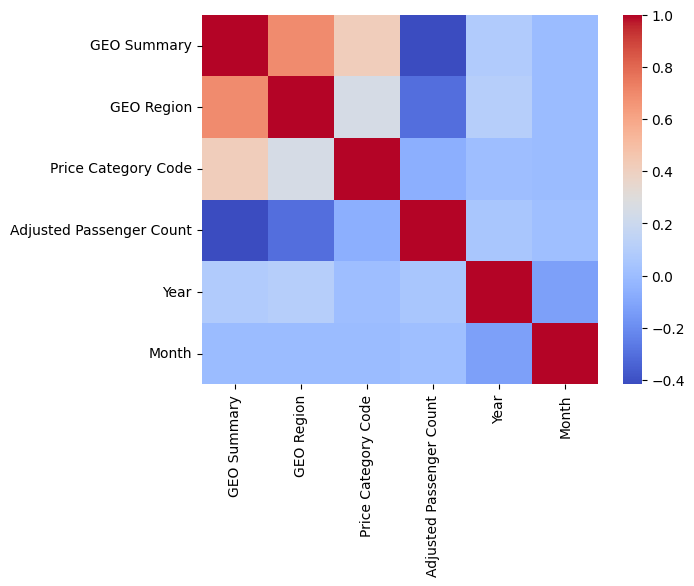

In [ ]:
sns.heatmap(df_aire2.corr(),cmap='coolwarm')

aunque podemos deducir poco podemos ver que los vuelos internacionales por lo general son mas caros y que los vuelos "domesticos" tienden mas a se low cost, aunque esta correlacion no sea muy alta

A continuacion iremos sacando graficas que relacionen variables para ver que podemos deducir de estas

<Axes: xlabel='Month', ylabel='Adjusted Passenger Count'>

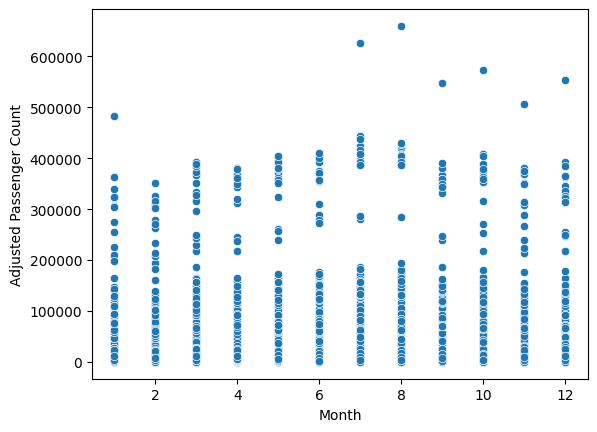

In [ ]:
sns.scatterplot(x='Month',y='Adjusted Passenger Count',data=df_aire2)

podemos ver que aunque la grafica sea muy regular, hay un ligero aumento de la gente que viaja en los meses de verano y que en invierno disminuye como era de esperar, seguramente por el clima y porque son periodos de vacaciones. En octubre tambien hay una ligera subida, y otra en diciembre seguramente devida a las vacaciones de navidad

<Axes: xlabel='Price Category Code', ylabel='Adjusted Passenger Count'>

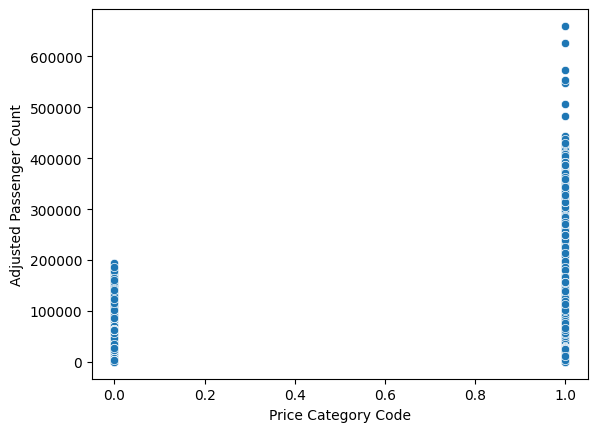

In [ ]:
sns.scatterplot(x='Price Category Code',y='Adjusted Passenger Count',data=df_aire2)

De esta otra grafica podemos deducir que la gente no coge tantos vuelos low price como esperariamos o que no hay tantos como vuelos por un precio estandar o caro. Tampoco podemos afirmar mucho ya que solo hay dos categorias que son low price y otros, por lo que otros engloba desde vuelos muy caros a vuelos por un precio estandar, pero aun asi impacta ver que el precio no es tan relevante a la hora de calcular cuantos pasajeros va a tener un vuelo

<Axes: xlabel='GEO Summary', ylabel='Adjusted Passenger Count'>

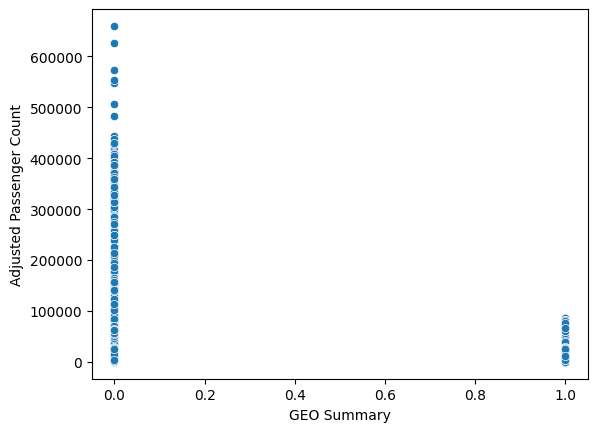

In [ ]:
sns.scatterplot(x='GEO Summary',y='Adjusted Passenger Count',data=df_aire2)

De esta otra grafica si que podemos afirmar que son mucho mas comunes los vuelos dentro de un mismo pais que los internacionales, seguramente por el precio y porque viajar a otro pais implica ademas tener tiempo de vacaciones para poder amortizar el viaje y pasar suficiente tiempo en el otro pais

<Axes: xlabel='GEO Region', ylabel='Adjusted Passenger Count'>

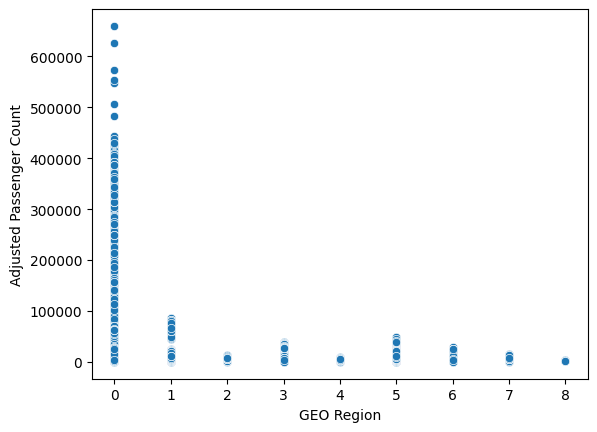

In [ ]:
sns.scatterplot(x='GEO Region',y='Adjusted Passenger Count',data=df_aire2)

En orden tenemos 0 = US,1 = 'Asia',2= "Australia / Oceania",3= "Canada",4="Central America",5="Europe",6="Mexico",7="Middle East",8="South America".
Podemos ver que la gente de estados unidos viaja mucho mas que la gente del resto del mundo en avion, en sudamerica, australia, centro america es  muy poco frecuente, seguramente por su nivel de vida, ya que son paises por lo general con menos riqueza

a simple vista podemos descartar la que tiene los mismos ejes, adjusted activity type code, price category code, ya que fue analizada antes,geo regions y geo summary

<Axes: xlabel='GEO Region', ylabel='Price Category Code'>

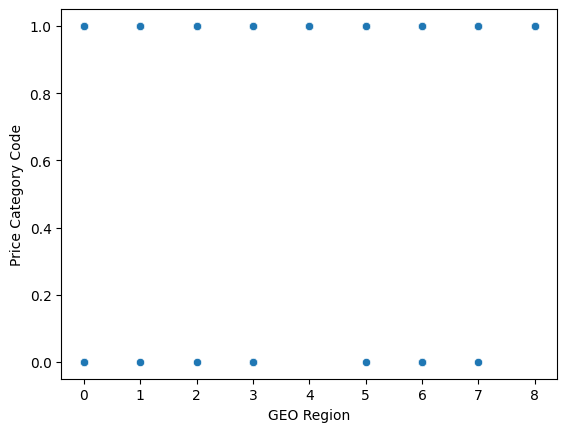

In [ ]:
sns.scatterplot(x='GEO Region',y='Price Category Code',data=df_aire2)

De esta grafica unicamente podemos observar que en centro america y sudamerica no hay vuelos baratos, por eso en parte es muy probable que esos paises tengan menos viajeros que el resto

<Axes: xlabel='GEO Summary', ylabel='Price Category Code'>

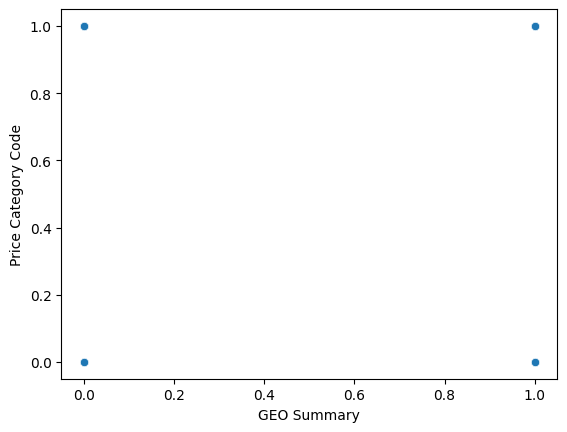

In [ ]:
sns.scatterplot(x='GEO Summary',y='Price Category Code',data=df_aire2)

no podemos ver ninguna relacion en que los vuelos internacionales o "domesticos" sean mas o menos caros debido a esto

<Axes: xlabel='Year', ylabel='Adjusted Passenger Count'>

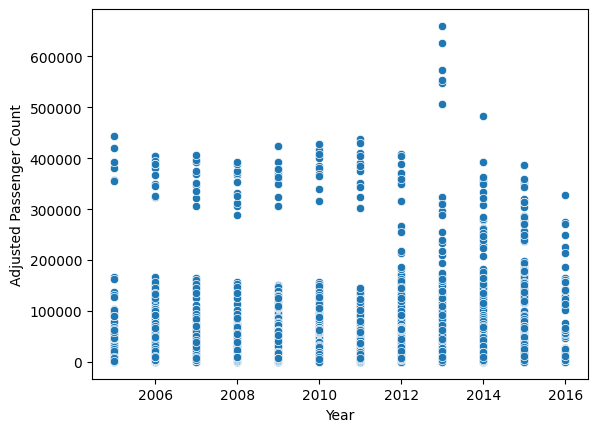

In [ ]:
sns.scatterplot(x='Year',y='Adjusted Passenger Count',data=df_aire2)

Aqui podemos ver que en 2013 hay un pico en cuanto a que es el año en el que mas personas han viajado en avion, aunque no sabemos porque, quizas se deba a que aparentemente se crearon mas aviones para llevar cantidades mas variadas de personas, ya que de 2005 a 2011 aparentemente los aviones dan un salto grande en cuanto a la cantidad de pasajeros que viajaban, seguramente porque hubiera menos modelos de avion y estos o eran masivos, con mucha gente, o eran pequeños/normales, con una capacidad de gente mas baja

<Axes: xlabel='GEO Summary', ylabel='GEO Region'>

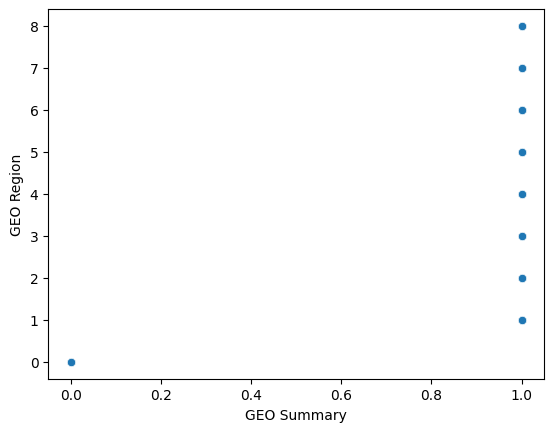

In [ ]:
sns.scatterplot(x='GEO Summary',y='GEO Region',data=df_aire2)

no podemos deducir nada mas que todos los vuelos de estados unidos no son internacionales y que los de otros paises si son internacionales, seguramente sea un convenio a la hora de guardar los datos en la base de datos


podemos mostrar todas las graficas para ver cuales a simple vista no van a ser interesantes

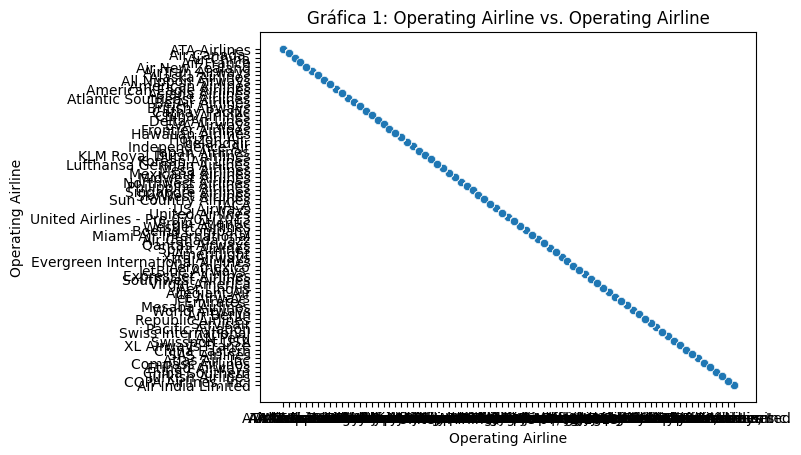

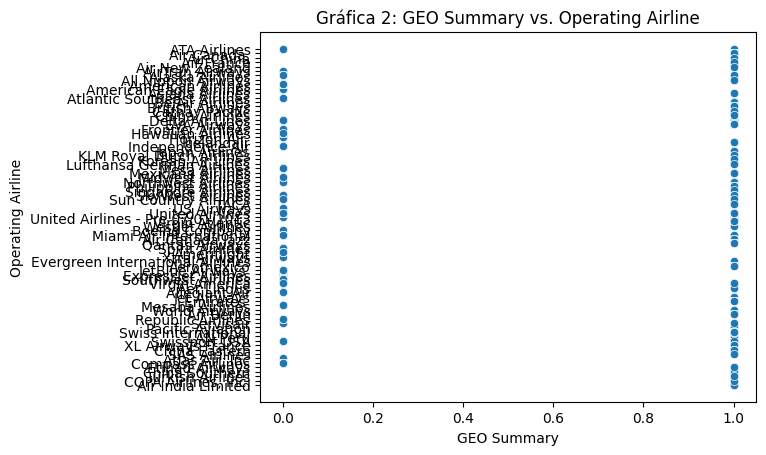

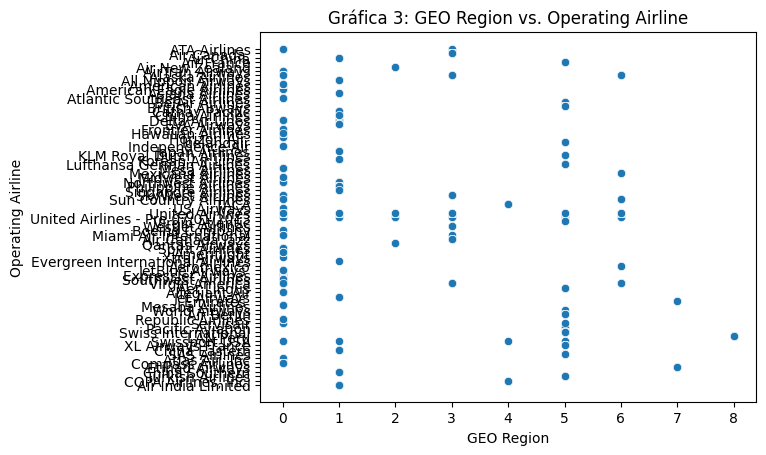

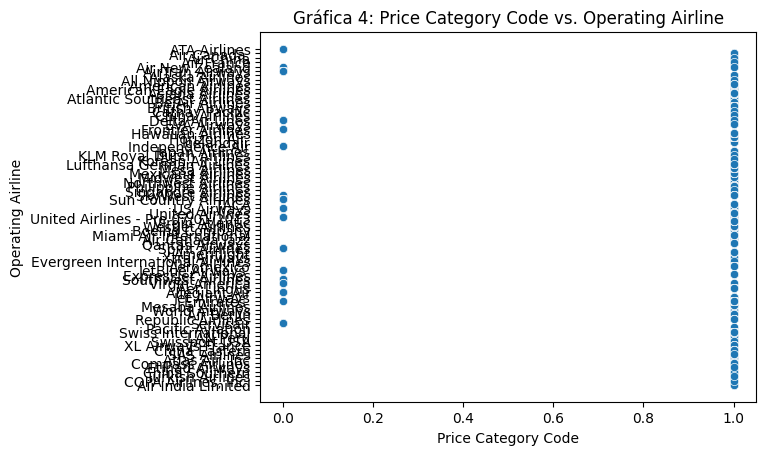

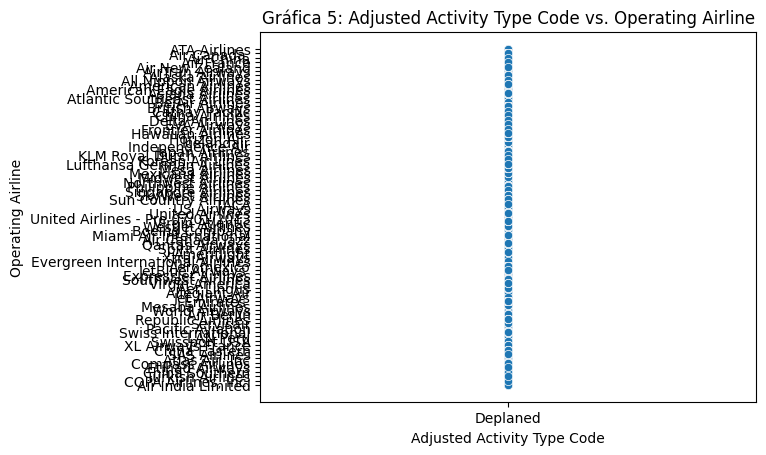

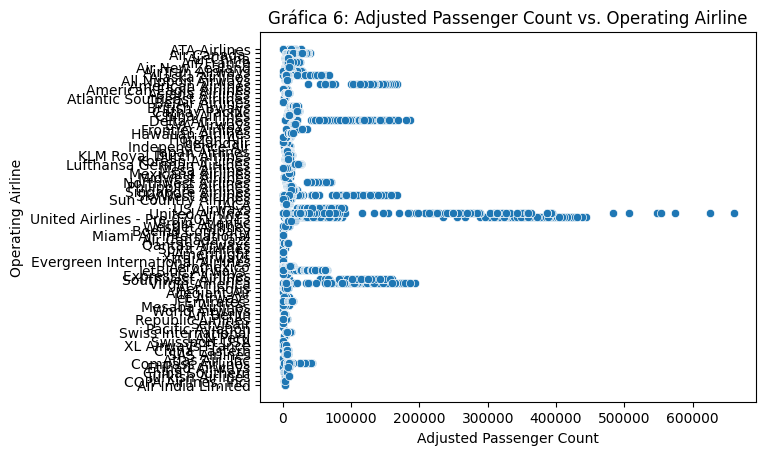

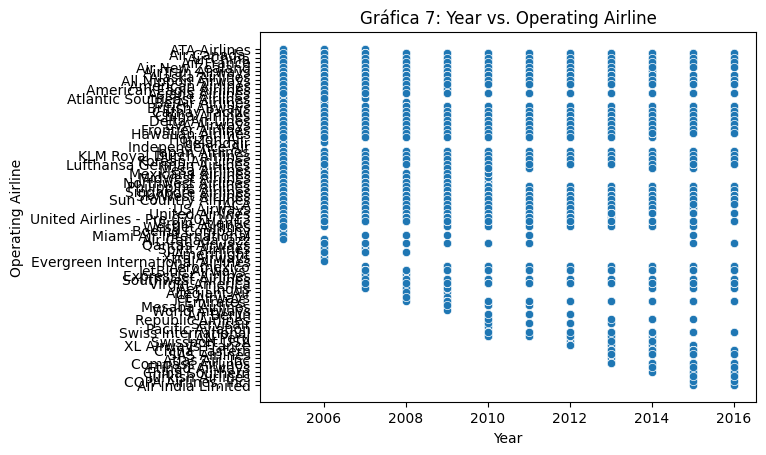

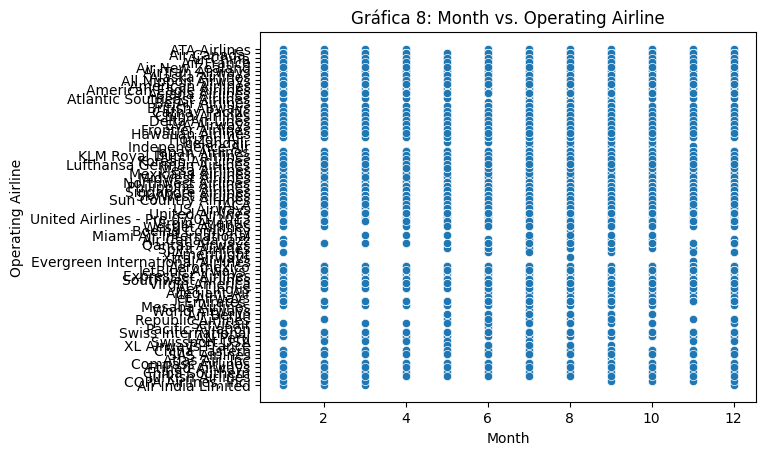

In [ ]:

columnas = df_aire2.columns

for i in range(len(columnas)):
    columna_actual = columnas[i]

    sns.scatterplot(x=columna_actual, y='Operating Airline', data=df_aire2)
    plt.title(f'Gráfica {i+1}: {columna_actual} vs. Operating Airline')
    plt.show()


<Axes: xlabel='GEO Summary', ylabel='Operating Airline'>

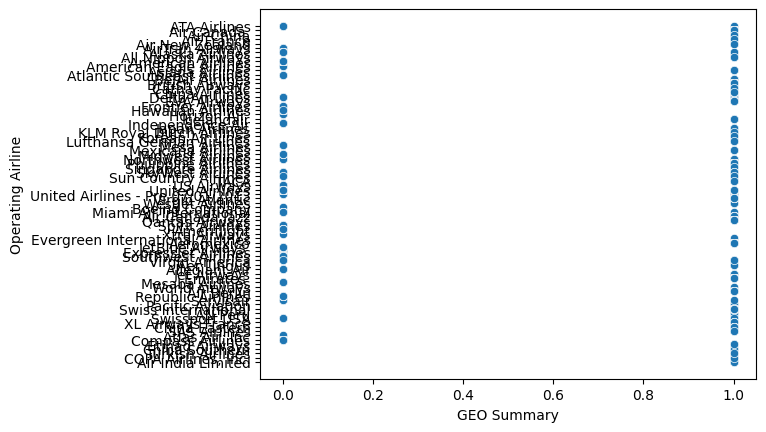

In [ ]:
sns.scatterplot(x='GEO Summary',y='Operating Airline',data=df_aire2)

Aplicamos la mejora de rendimiento mediante vectorización y como podemos observar es bastante mas rapido.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtra las columnas numéricas
columnas_numericas = df_aire2.select_dtypes(include='number')

# Genera la matriz de gráficos de dispersión
sns.pairplot(df_aire2, x_vars=columnas_numericas, y_vars='Operating Airline')
plt.show()


Aunque no se entienda mucho, nos complementa con la grafica de arriba y nos dice que seguramente cada compañia tendra una politica especifica de vuelos internacionales o domesticos, y que la anterior grafica nos indique donde se encuentran esas compañias y por lo general vemos que los vuelos internacionales son todos por compañias de estados unidos

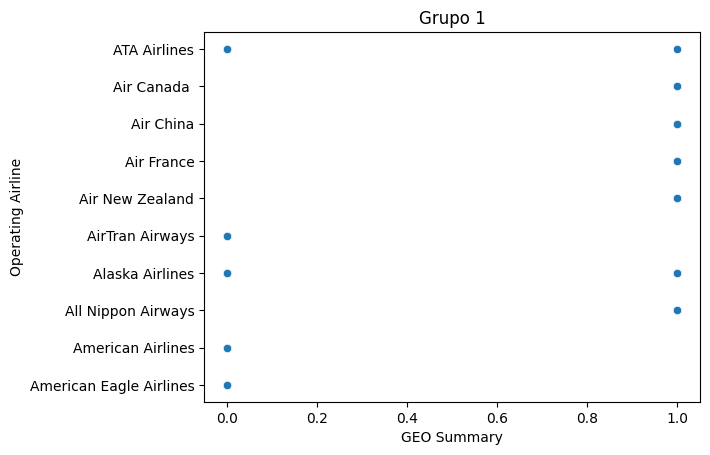

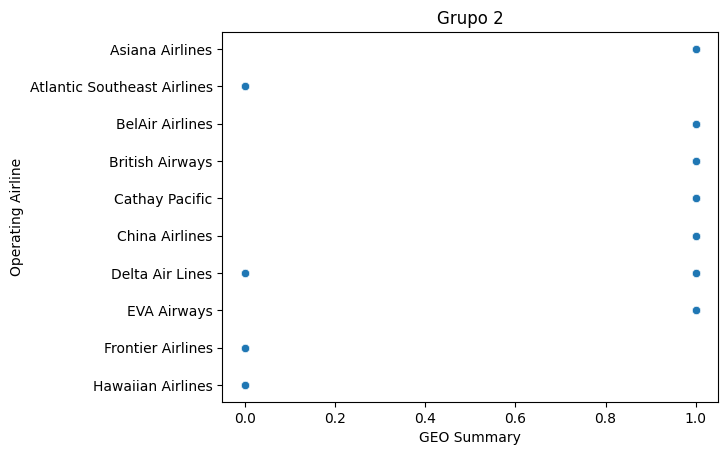

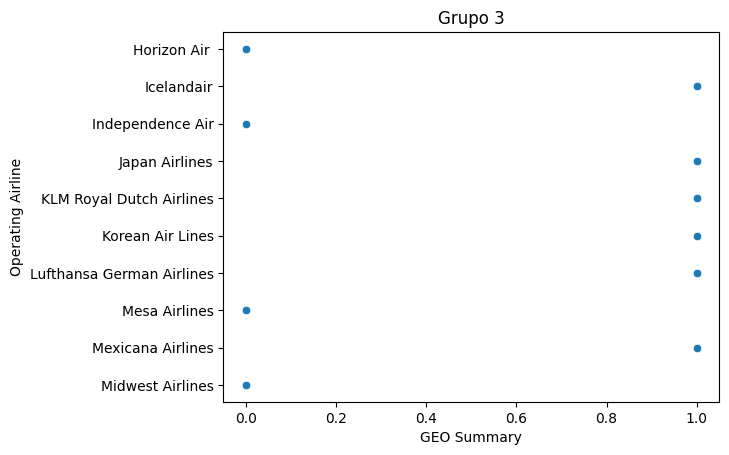

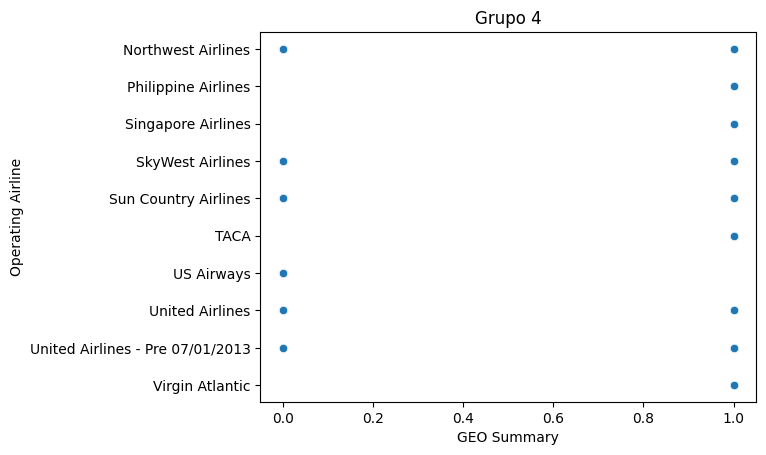

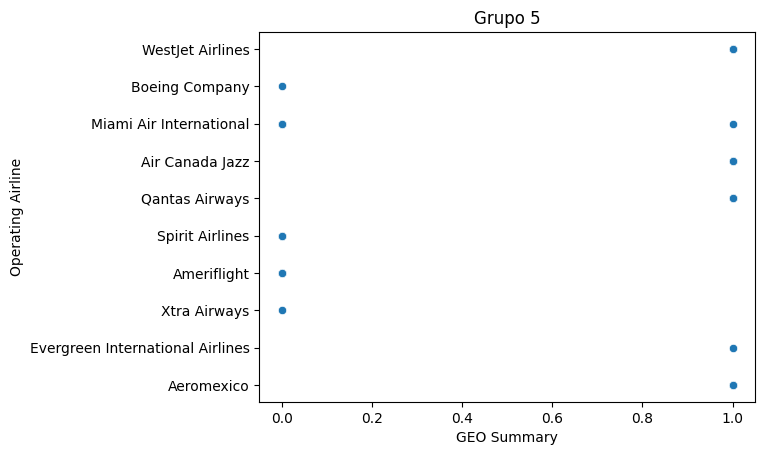

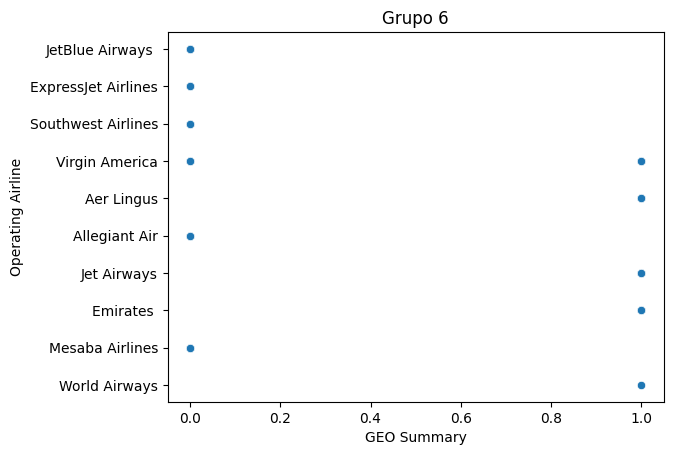

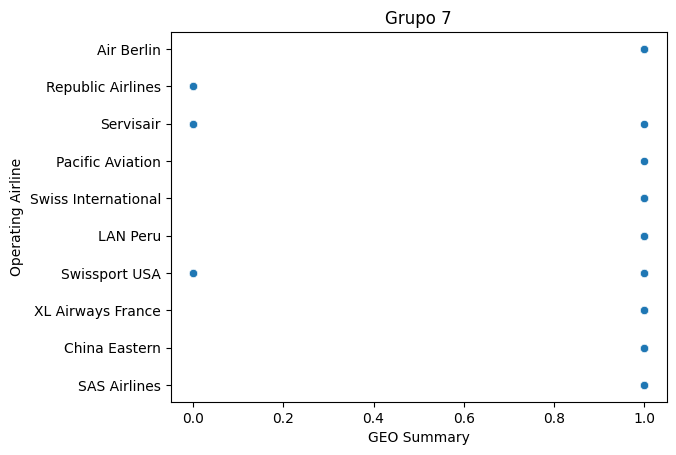

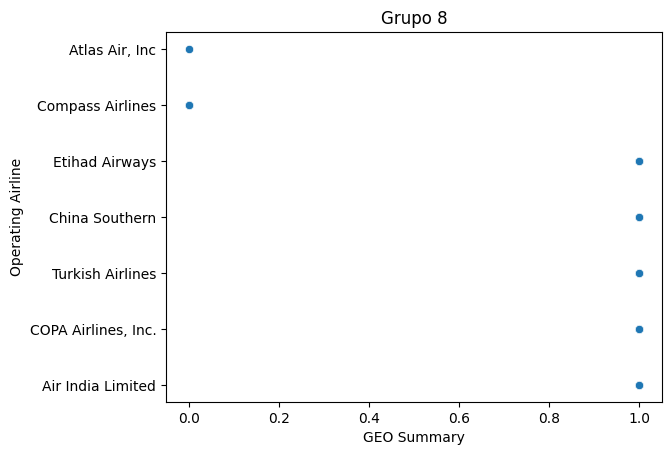

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener la lista de aerolíneas únicas en el DataFrame
operating_airlines = df_aire2['Operating Airline'].unique()

# Dividir las aerolíneas en grupos de 10
grupo_aerolineas = [operating_airlines[i:i+10] for i in range(0, len(operating_airlines), 10)]

# Realizar un bucle para generar las gráficas por grupo de aerolíneas
for i, grupo in enumerate(grupo_aerolineas):
    # Crear un subconjunto del DataFrame solo con las aerolíneas del grupo actual
    subset_df = df_aire2[df_aire2['Operating Airline'].isin(grupo)]

    # Generar la gráfica scatterplot
    sns.scatterplot(x='GEO Summary', y='Operating Airline', data=subset_df)

    # Personalizar el título de la gráfica
    plt.title(f'Grupo {i+1}')

    # Mostrar la gráfica
    plt.show()



Lo aplicamos aqui tambien y comparamos.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Utiliza un swarmplot para visualizar todas las aerolíneas
sns.swarmplot(x='GEO Summary', y='Operating Airline', data=df_aire2)

# Personaliza el título de la gráfica
plt.title('Gráfico Swarmplot de Operating Airline vs GEO Summary')

# Muestra la gráfica
plt.show()


In [ ]:
df_aire2['Operating Airline'].nunique()

77

vemos que hay compañias que ofrecen un unico servicio y otras que ofrecen ambos. Internacionales y domesticos o solo uno de ellos.

Veamos ahora

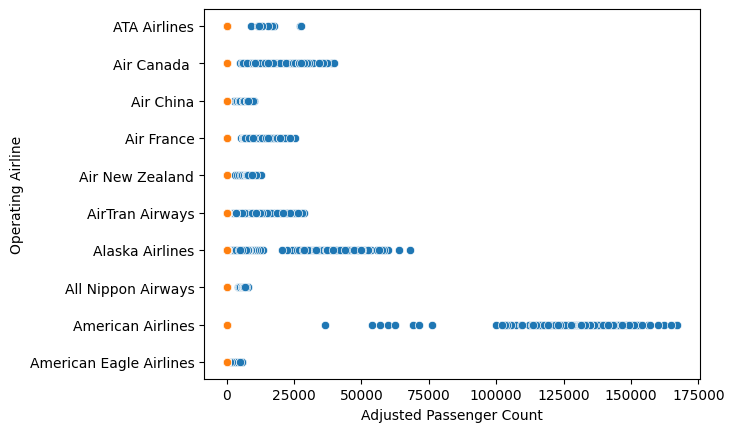

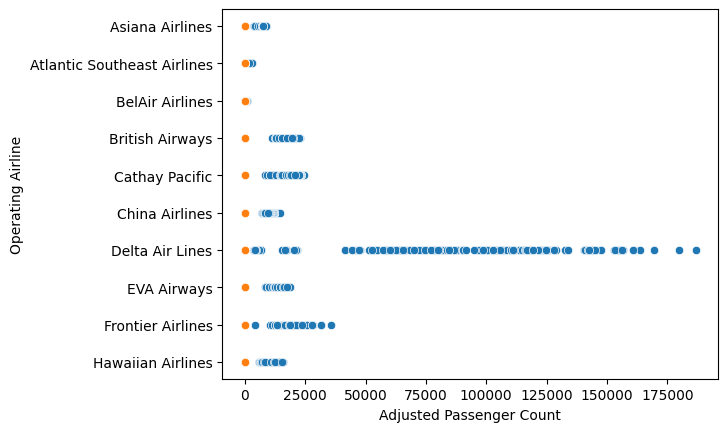

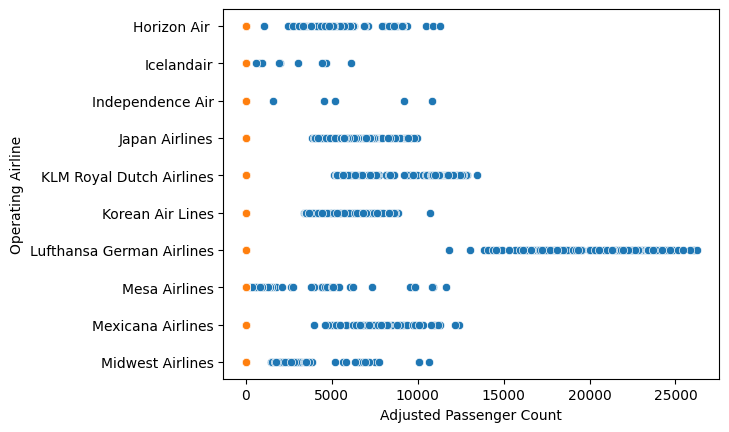

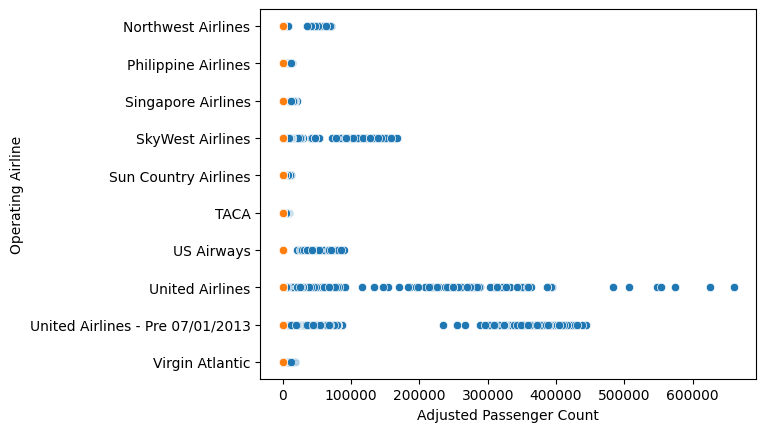

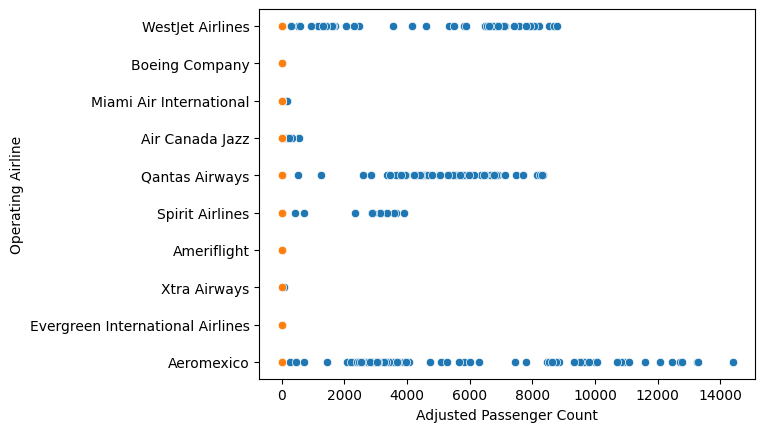

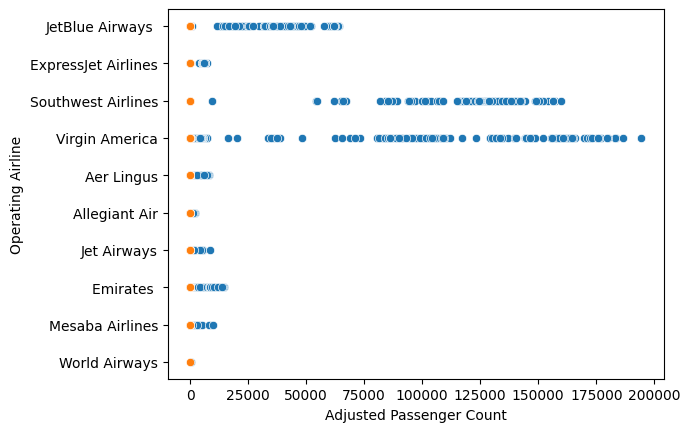

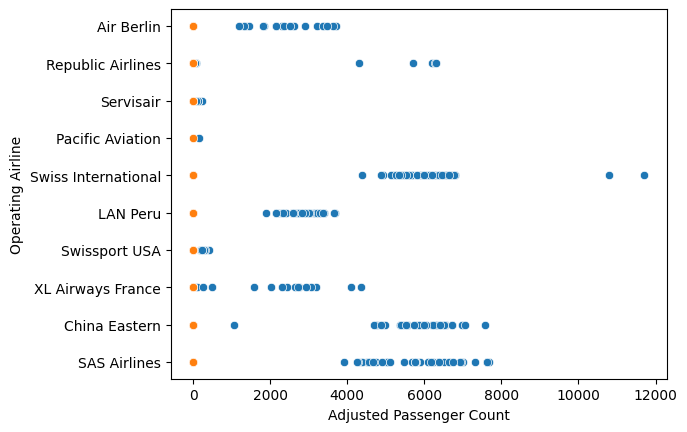

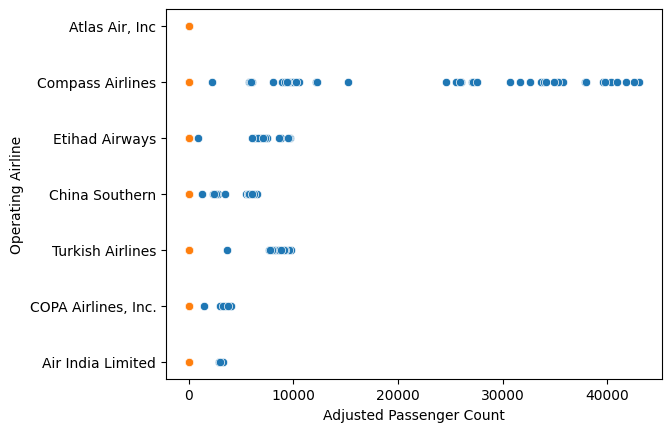

In [ ]:
for i, grupo in enumerate(grupo_aerolineas):
    subset_df = df_aire2[df_aire2['Operating Airline'].isin(grupo)]
    sns.scatterplot(x='Adjusted Passenger Count', y='Operating Airline', data=subset_df)

    sns.scatterplot(x='Price Category Code', y='Operating Airline', data=subset_df)
    plt.show()

Para vectorizar el código y generar todas las gráficas en un solo paso, puedes utilizar seaborn.catplot con el argumento kind='swarm'. Esto te permitirá crear gráficos de swarmplot para cada grupo de aerolíneas en el DataFrame.

En este código, hemos utilizado seaborn.catplot con kind='swarm' para crear gráficos de swarmplot para las columnas 'Adjusted Passenger Count' y 'Price Category Code' en relación con 'Operating Airline' para cada grupo de aerolíneas. La ventaja de usar seaborn.catplot es que puede generar varias gráficas en un solo paso, lo que simplifica el proceso y reduce la necesidad de bucles for.



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Dividir las aerolíneas en grupos de 10
grupo_aerolineas = [operating_airlines[i:i+10] for i in range(0, len(operating_airlines), 10)]

# Realizar un bucle para generar las gráficas por grupo de aerolíneas
for i, grupo in enumerate(grupo_aerolineas):
    # Crear un subconjunto del DataFrame solo con las aerolíneas del grupo actual
    subset_df = df_aire2[df_aire2['Operating Airline'].isin(grupo)]

    # Utilizar catplot con kind='swarm' para crear un gráfico de swarmplot
    sns.catplot(x='Adjusted Passenger Count', y='Operating Airline', data=subset_df, kind='swarm', aspect=2)
    plt.title(f'Grupo {i+1}')

    sns.catplot(x='Price Category Code', y='Operating Airline', data=subset_df, kind='swarm', aspect=2)

# Mostrar todas las gráficas
plt.show()


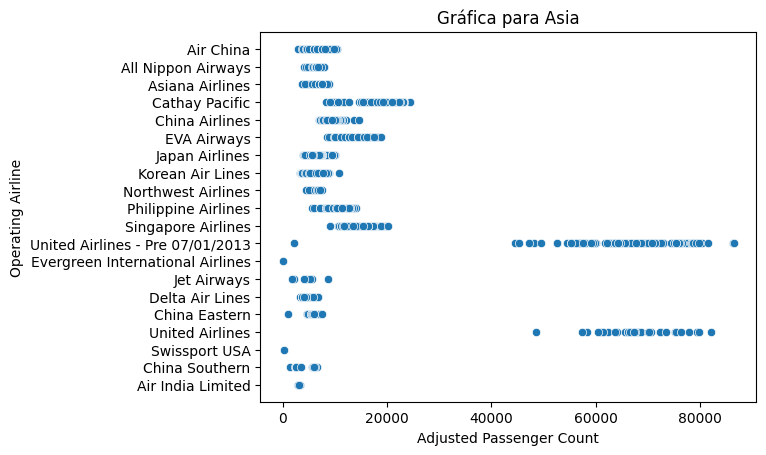

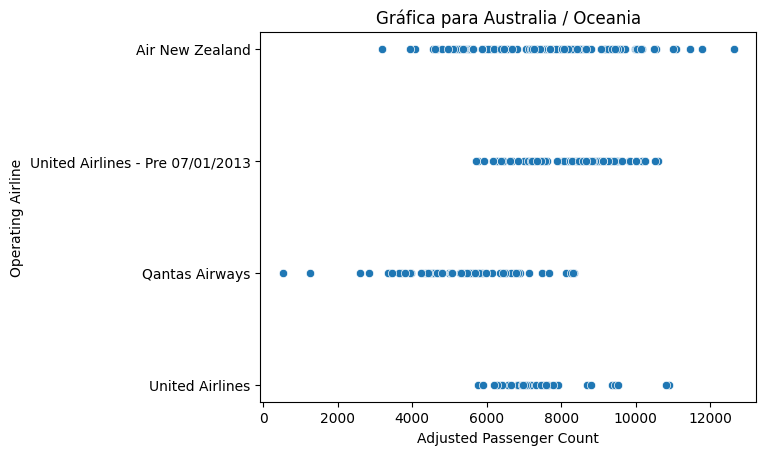

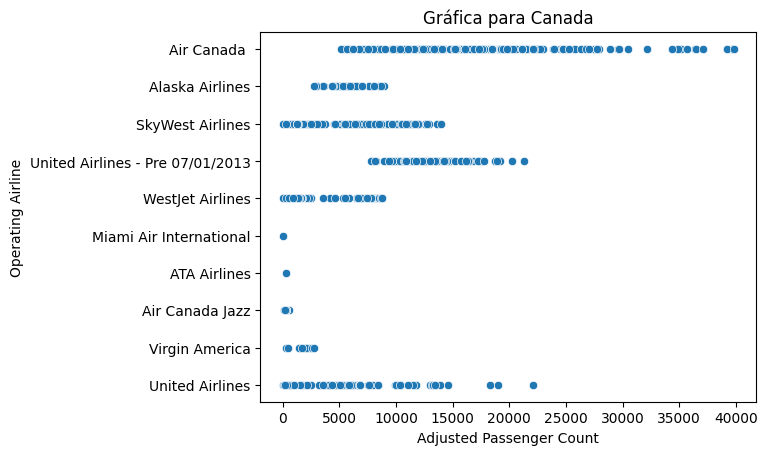

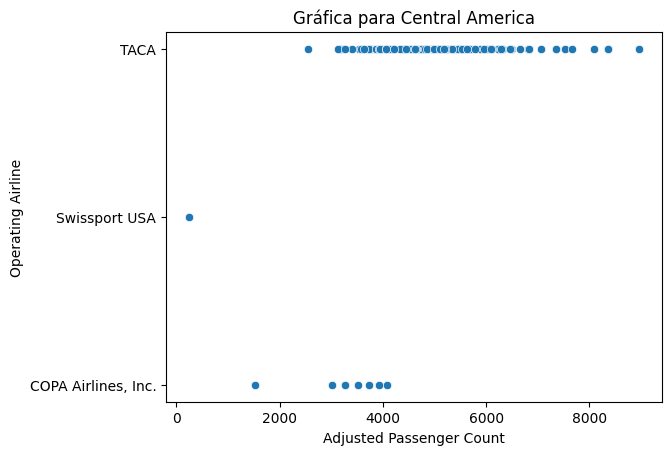

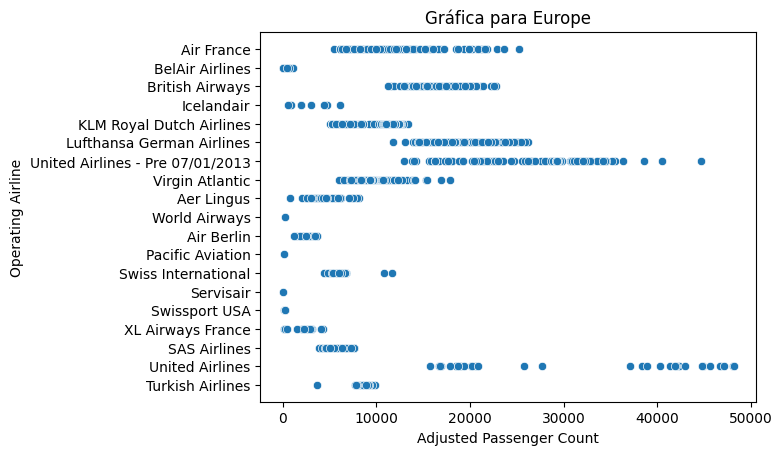

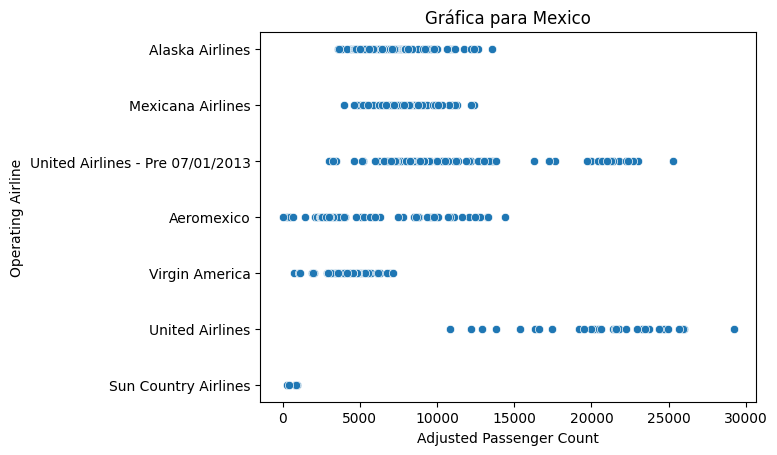

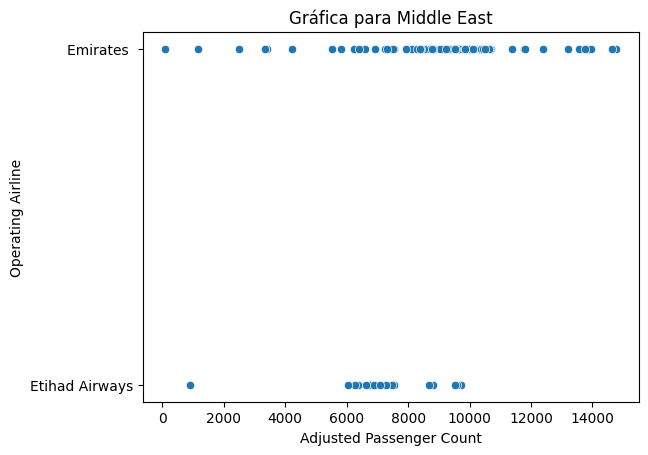

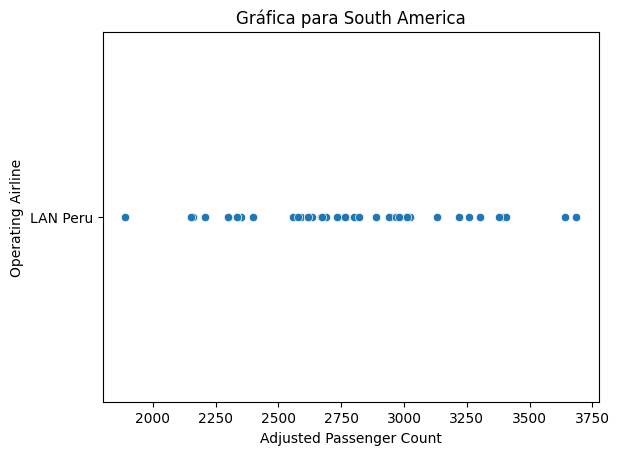

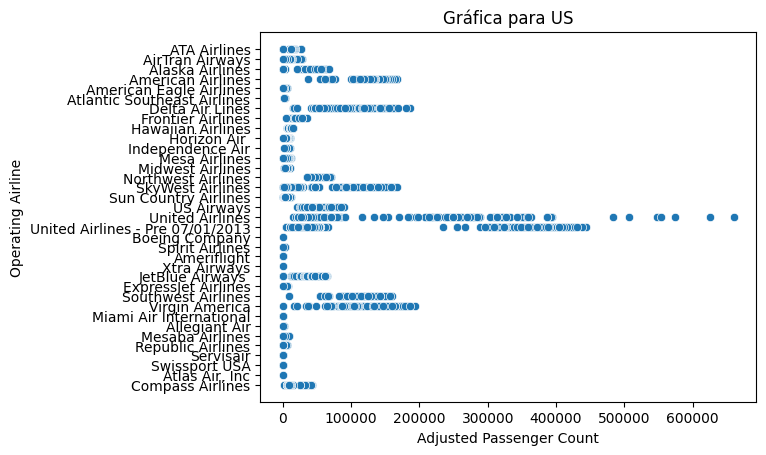

In [ ]:

df_aire2['GEO Region'].replace([0,1,2,3,4,5,6,7,8],['US','Asia',"Australia / Oceania","Canada","Central America","Europe","Mexico","Middle East","South America" ],inplace=True)

# Agrupar las compañías por país
grouped_df = df_aire2.groupby('GEO Region')['Operating Airline'].unique()

# Realizar un bucle para generar las gráficas por país
for country, airlines in grouped_df.items():
  subset_df = df_aire2[df_aire2['GEO Region'] == country]

  sns.scatterplot(x='Adjusted Passenger Count', y='Operating Airline', data=subset_df)
  plt.title(f'Gráfica para {country}')

  plt.show()


Para vectorizar el código y generar todas las gráficas en un solo paso, puedes utilizar un gráfico de swarmplot de Seaborn. Esto te permitirá visualizar la relación entre 'Adjusted Passenger Count' y 'Operating Airline' para cada región geográfica (GEO Region) en el DataFrame. Aquí tienes cómo hacerlo:

En este código, hemos reemplazado los valores numéricos en 'GEO Region' con etiquetas descriptivas, luego utilizamos seaborn.catplot con kind='swarm' para crear un gráfico de swarmplot que visualiza la relación entre 'Adjusted Passenger Count' y 'Operating Airline' para cada región geográfica. El argumento hue se utiliza para colorear los puntos según la región geográfica. Esto reemplaza el bucle for que se utilizaba para generar gráficas individuales por región geográfica.

In [ ]:
# Reemplaza los valores numéricos de 'GEO Region' con etiquetas descriptivas
df_aire2['GEO Region'].replace([0, 1, 2, 3, 4, 5, 6, 7, 8], ['US', 'Asia', 'Australia / Oceania', 'Canada', 'Central America', 'Europe', 'Mexico', 'Middle East', 'South America'], inplace=True)

# Utiliza un swarmplot para visualizar la relación entre 'Adjusted Passenger Count' y 'Operating Airline' para cada región geográfica
sns.catplot(x='Adjusted Passenger Count', y='Operating Airline', hue='GEO Region', data=df_aire2, kind='swarm', height=5, aspect=2)

# Personaliza el título de la gráfica
plt.title('Gráfica Swarmplot de Operating Airline vs. Adjusted Passenger Count por Región Geográfica')

# Muestra la gráfica
plt.show()

Podemos ver que en asia y en estados unidos son los paises en los que mas personas viajan seguidos de europa y canada, en el resto de paises viajan bastantes menos personas.Seguramente se deba a que existe mucha mas poblacion en esos paises y que tienen mejores condiciones de vida. Podemos ver tambien que las compañias que ofrecen vuelos internacionales y domesticos y las que ofrecen vuelos baratos y caros, es decir las compañias con mas variedad de servicios son las que mas viajeros llevan a bordo, seguramente debido a que acogen a un publico muy amplio y no a un tipo mas concreto de persona. Tambien podemos ver que estas compañias son brutalmente mas grandes (a nivel economico y de recursos) que el resto de compañias y por lo tanto tienen mas aviones y mas gente volando.


a continuacion entrenaremos con sklearn nuestro dataset para ver si con una serie de datos de entrada es capaz de predecir el numero de pasajeros

transformamos en numeros la columna empresas, ya que en teoria es una de las mas importantes para predecir los pasajeros de un vuelo



In [ ]:
for i in range(len(df_aire2['Operating Airline'].unique())):
    df_aire2['Operating Airline'].replace(df_aire2['Operating Airline'].unique()[i],i,inplace=True)

Para eliminar el bucle for y vectorizar el proceso de asignar índices únicos a las aerolíneas, puedes utilizar la función pandas.factorize(). Esta función asigna automáticamente un índice único a cada valor único en una Serie. Aquí tienes cómo hacerlo:

La función pd.factorize() asignará índices únicos a cada valor único en la columna 'Operating Airline' y devolverá dos resultados: el DataFrame con las aerolíneas reemplazadas por sus índices únicos, y un array de índices únicos (unique_index) que puedes utilizar más adelante si es necesario.

Este enfoque elimina la necesidad de utilizar un bucle for para asignar manualmente índices únicos a las aerolíneas y es más eficiente y legible.

In [ ]:
data = {'Operating Airline': ['Aerolinea1', 'Aerolinea2', 'Aerolinea1', 'Aerolinea3', 'Aerolinea2']}
df_aire2 = pd.DataFrame(data)

# Utilizar factorize para asignar índices únicos a las aerolíneas
df_aire2['Operating Airline'], unique_index = pd.factorize(df_aire2['Operating Airline'])

print(df_aire2)

normalizamos los datos para que no suceda lo de arriba

In [ ]:
from sklearn.model_selection import train_test_split

x = df_aire2.drop(["Adjusted Passenger Count","Adjusted Activity Type Code"], axis=1)
y = df_aire2["Adjusted Passenger Count"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
y_train.value_counts(normalize = True),y_test.value_counts(normalize = True)

(6939     0.000707
 10194    0.000707
 7497     0.000707
 7483     0.000530
 6341     0.000530
            ...   
 9589     0.000177
 38177    0.000177
 9456     0.000177
 9783     0.000177
 11610    0.000177
 Name: Adjusted Passenger Count, Length: 5113, dtype: float64,
 6794      0.002120
 6969      0.001413
 6906      0.001413
 1133      0.001413
 2736      0.001413
             ...   
 9514      0.000707
 10388     0.000707
 2677      0.000707
 10316     0.000707
 360412    0.000707
 Name: Adjusted Passenger Count, Length: 1375, dtype: float64)

In [ ]:

df_aire2['GEO Region'].replace(['Canada','Mexico','Central America','South America','Europe','Asia','Australia / Oceania','Africa'],[1,2,3,4,5,6,7,8],inplace=True)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

# Extraer las características (atributos)
X = df_aire2[['GEO Region', 'Price Category Code', 'Operating Airline']].values
y = df_aire2['Adjusted Passenger Count'].values

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar los datos utilizando MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear y entrenar el modelo de clasificación
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test_scaled)

# Calcular la precisión del modelo en el conjunto de prueba
accuracy = accuracy_score(y_test, y_pred)

# Imprimir la precisión del modelo
print("Precisión del modelo:", accuracy)

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("Coeficiente de determinación R^2:", r2)
print(y_pred[0])

Precisión del modelo: 0.0
Coeficiente de determinación R^2: -0.16724425864535952
6437


vemos que el modelo logistico no es nada util ya que tiene un R2 muy lejano a 1 o -1 y que la precision es de 0. Podemos ver que la solucion que nos ha dado tambien dista bastante de la real

In [ ]:
from sklearn.ensemble import RandomForestClassifier
X = df_aire2[['GEO Region', 'Price Category Code', 'Operating Airline']].values
y = df_aire2['Adjusted Passenger Count'].values

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de clasificación
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la precisión del modelo en el conjunto de prueba
accuracy = accuracy_score(y_test, y_pred)

# Imprimir la precisión del modelo
print("Precisión del modelo:", accuracy)

Precisión del modelo: 0.0014134275618374558


probando el modelo random forest vemos que la precision crece un minimo, pero sigue siendo irrelevnte o inutil

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Cargar la base de datos desde un archivo CSV
# ...

# Extraer las características (atributos) y la variable objetivo
X = df_aire2[['GEO Region' , 'Price Category Code', 'Operating Airline']].values
y = df_aire2['Adjusted Passenger Count'].values

# Normalizar los datos
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de KNN
model = KNeighborsClassifier(n_neighbors=5)

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la precisión del modelo en el conjunto de prueba
accuracy = accuracy_score(y_test, y_pred)

# Imprimir la precisión del modelo
print("Precisión del modelo:", accuracy)

Precisión del modelo: 0.0014134275618374558


podemos ver tambien, que eliminando de x test la variable mes y la variable geo summary aumenta la precision, lo que quiere decir que esas variables solo confunden a nuestro aprendizaje supervisado

In [ ]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
# Cargar la base de datos desde un archivo CSV
# ...

# Extraer las características (atributos) y la variable objetivo
X = df_aire2[['GEO Region', 'GEO Summary', 'Price Category Code', 'Operating Airline', 'Month']].values
y = df_aire2['Adjusted Passenger Count'].values

# Normalizar los datos
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de PLSR
model = PLSRegression(n_components=2)

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el coeficiente de determinación (R²)
r2 = r2_score(y_test, y_pred)

# Imprimir el coeficiente de determinación
print("Coeficiente de determinación (R²):", r2)



Coeficiente de determinación (R²): 0.16882290621999185


vemos que con este modelo tenemos un R2 un poco mejor pero aun asi no es suficiente como para decir que las variables mes, region, sumario y compañia sean relevantes a la hora de calcular las personas que va a tener el vuelo

despues de probar varios modelos mas pero vemos que todos los resultados son bastante malos, por lo que vamos a probar a eliminar los registros cuya desviacion estandar sea bastante alta, de manera que no afecten a nuestro modelo de prediccion

In [ ]:
import numpy as np

# Calcular la desviación estándar de cada columna
std_devs = np.std(df_aire2, axis=0)

# Establecer un umbral para determinar qué valores considerar como "altos"
threshold = 15000  # Por ejemplo, 2 desviaciones estándar por encima de la media

# Identificar las filas con desviaciones estándar altas en al menos una columna
high_std_rows = np.any(df_aire2 > threshold * std_devs, axis=1)

# Eliminar las filas con desviaciones estándar altas
df_aire2_filtered = df_aire2[~high_std_rows]

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3613: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
<ipython-input-94-aef7d4139470>:10: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  high_std_rows = np.any(df_aire2 > threshold * std_devs, axis=1)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Cargar la base de datos desde un archivo CSV
# ...

# Extraer las características (atributos) y la variable objetivo
X = df_aire2[['GEO Region' , 'Price Category Code', 'Operating Airline']].values
y = df_aire2['Adjusted Passenger Count'].values

# Normalizar los datos
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de KNN
model = KNeighborsClassifier(n_neighbors=5)

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la precisión del modelo en el conjunto de prueba
accuracy = accuracy_score(y_test, y_pred)

# Imprimir la precisión del modelo
print("Precisión del modelo:", accuracy)

Precisión del modelo: 0.0014134275618374558


In [ ]:
from sklearn.ensemble import RandomForestClassifier
X = df_aire2[['GEO Region', 'Price Category Code', 'Operating Airline']].values
y = df_aire2['Adjusted Passenger Count'].values

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de clasificación
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la precisión del modelo en el conjunto de prueba
accuracy = accuracy_score(y_test, y_pred)

# Imprimir la precisión del modelo
print("Precisión del modelo:", accuracy)

Precisión del modelo: 0.0014134275618374558


Podemos concluir entonces con que no existe mucha relacion aparente entre los valores de la columna adjsted passenger count y el resto de columnas, es decir los  valores de esta columna no dependen del resto de columnas y por lo cual es muy dificil predecir cuanta gente va a coger un vuelo pese a saber el resto de datos, aunque esto es un poco contradictorio con las primeras graficas que obtuvimos que nos mostraban como algunos paises y algunas compañias tenian mas viajeros que el resto, aunque esto, visto lo visto, seguramente se debe a que de estos paises salen mas vuelos y las compañias tienen mas vuelos, pero no por ello llevan mas gente en cada vuelo, si no que al tener mas vuelos pues llevan mas gente, aunque el promedio de gente por vuelo sea relativamente parecido al resto de compañias y paises